In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from Novel_Metrics import *

In [ ]:

# Define labels to iterate through
labels = [ "Stressed_or_anxious", "Sleep_class", "Angry_or_frustrated", "Calm_or_peaceful"]

# Define parameters
L = 3  # Same as used for training
k = 3  # Same as used for training
results_folder = 'FnF_Results' 
# Loop through each label
for label_name in labels:
    # Define the path to the consolidated metrics CSV for each label
    metrics_file_path = os.path.join(results_folder, f"{label_name}_L{L}_k{k}", "metrics", "consolidated_metrics_all_strategies_with_uncertainty.csv")
    
    # Load the data
    consolidated_df = pd.read_csv(metrics_file_path)
    
    # Calculate mean and standard deviation for each strategy and node type
    performance_summary = (
        consolidated_df.groupby(['strategy', 'node_type'])['accuracy']
        .agg(['mean', 'std'])
        .reset_index()
    )
    
    # Format mean and std as "mean (std)"
    performance_summary['mean_std'] = performance_summary['mean'].round(2).astype(str) + " (" + performance_summary['std'].round(2).astype(str) + ")"
    
    # Pivot the table to get strategies as rows and node types as columns
    pivot_table = performance_summary.pivot(index='strategy', columns='node_type', values='mean_std')
    
    # Print the table for the current label
    print(f"Performance Summary for {label_name} (L={L}, k={k}):")
    print(pivot_table)
    print("\n" + "="*50 + "\n")


Performance Summary for Stressed_or_anxious (L=3, k=3):
node_type                    test_set_same_day train_nodes_next_day  \
strategy                                                              
age                                0.84 (0.15)          0.82 (0.26)   
coreset                            0.85 (0.16)          0.78 (0.25)   
degree                             0.81 (0.15)          0.65 (0.27)   
density                            0.84 (0.15)          0.81 (0.27)   
featProp                           0.86 (0.15)          0.83 (0.23)   
graphpart                          0.83 (0.16)          0.81 (0.39)   
graphpartfar                       0.78 (0.16)          0.69 (0.46)   
pagerank                           0.83 (0.15)           0.9 (0.22)   
random_sample                      0.85 (0.15)           0.8 (0.24)   
uncertainty_entropy                0.85 (0.15)          0.79 (0.26)   
uncertainty_least_confidence       0.85 (0.15)          0.79 (0.26)   
uncertainty_margin   

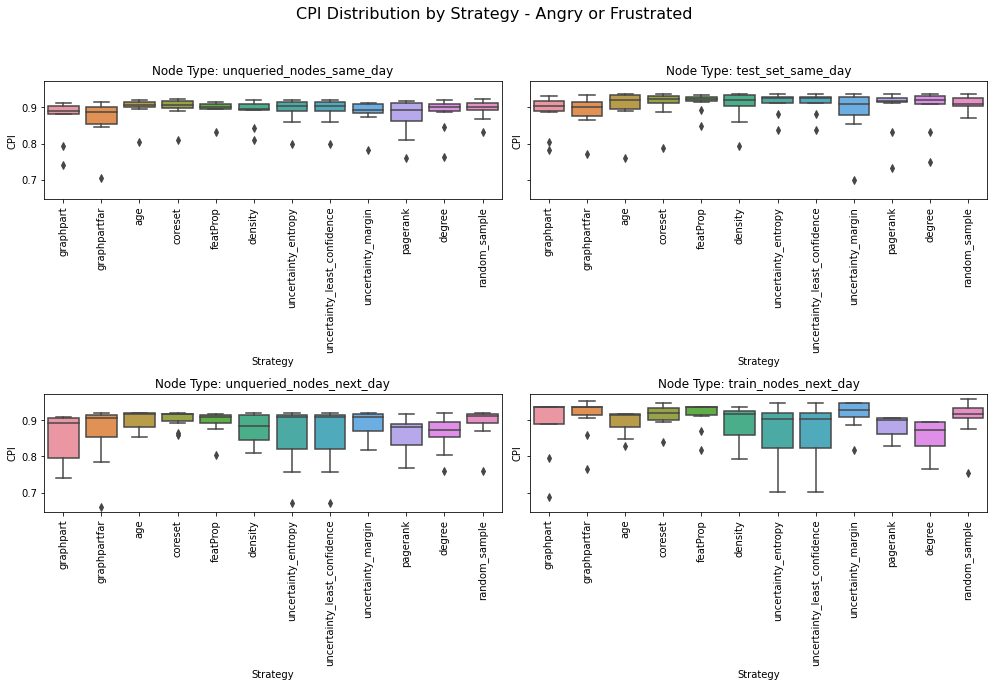

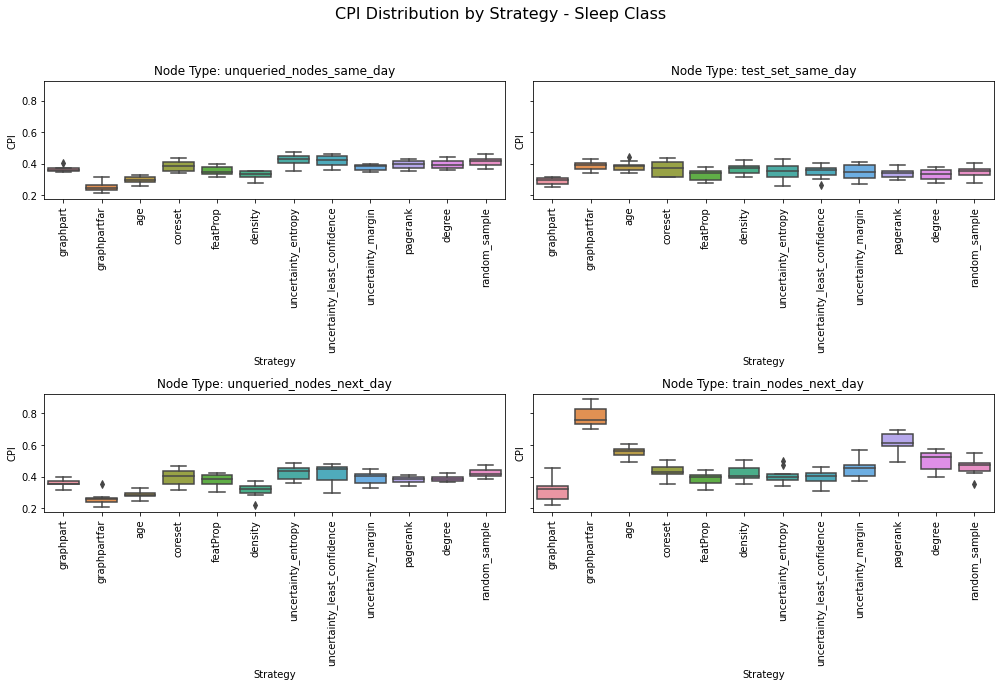

In [ ]:
## Compute and Plot CPI for different stratgies

# Load data for  Sleep labels
sleep_df = pd.read_csv("results/Sleep_class_L3_k3/metrics/consolidated_metrics_all_strategies_with_uncertainty.csv")

# Define node types to analyze
node_types_to_plot = ['unqueried_nodes_same_day','test_set_same_day','unqueried_nodes_next_day', 'train_nodes_next_day',]
sleep_cpi_df = compute_cpi_summary(sleep_df, "Sleep Class", node_types_to_plot)

# Plot for "Sleep Class"
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
fig.suptitle("CPI Distribution by Strategy - Sleep Class", fontsize=16)

for i, node_type in enumerate(sleep_cpi_df['node_type'].unique()):
    ax = axes[i // 2, i % 2]
    sns.boxplot(
        data=sleep_cpi_df[sleep_cpi_df['node_type'] == node_type],
        x='strategy',
        y='CPI',
        ax=ax
    )
    ax.set_title(f"Node Type: {node_type}")
    ax.set_xlabel("Strategy")
    ax.set_ylabel("CPI")
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


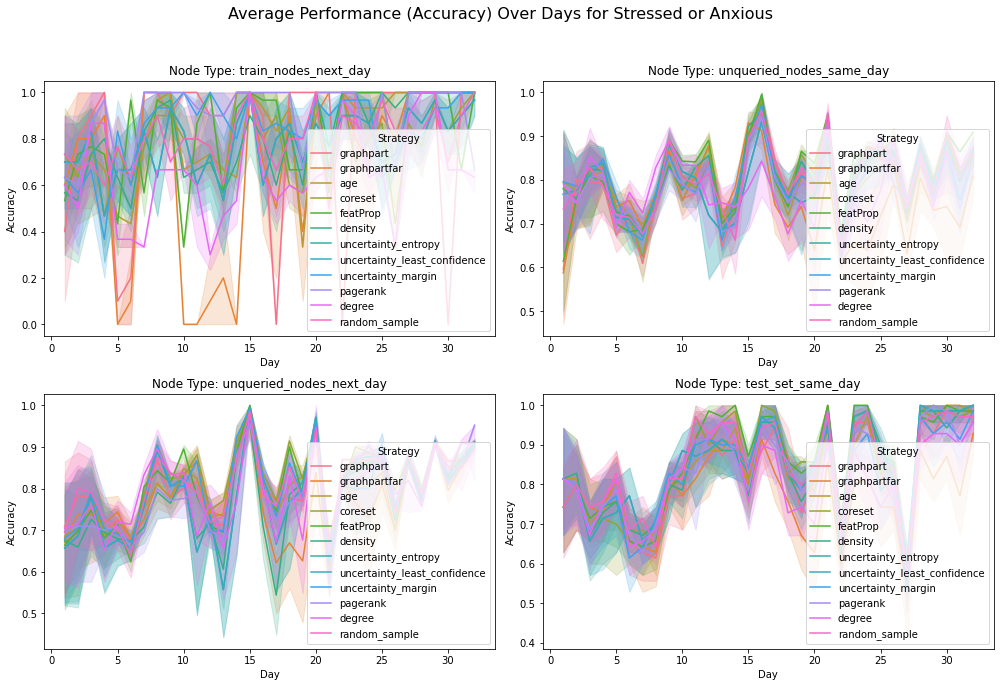

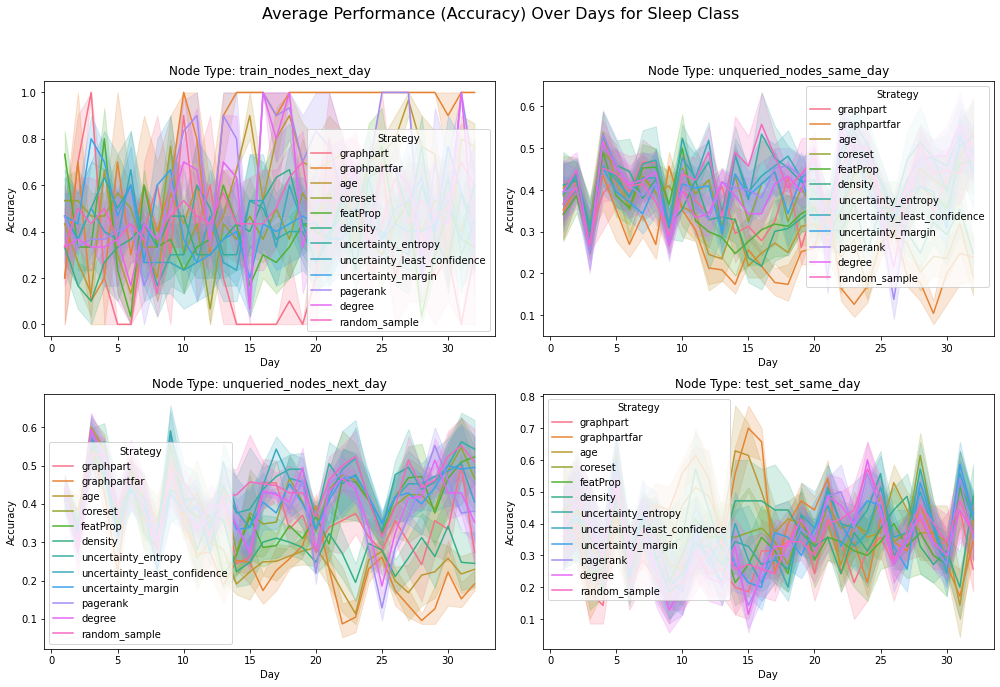

In [ ]:
# Analyze the performance over time
plot_time_avg_performance(sleep_df, "Sleep Class")


In [ ]:
## Compute diversity metrics and plot box plots of sampling entropy, coverage ratio and avergae time gap for all stratgies
strategies = ['graphpart' 'graphpartfar' 'age' 'coreset' 'featProp' 'density'
 'uncertainty_entropy' 'uncertainty_least_confidence' 'uncertainty_margin'
 'pagerank' 'degree' 'random_sample']  # Add all relevant strategies


# Define the correct base path
base_folder = "results"
label_name = "Sleep_class"
user_log_path = os.path.join(base_folder, f"{label_name}_L3_k3", "user_log")

# Find all unique strategy folders within the "user_log" directory
strategies = [name for name in os.listdir(user_log_path) if os.path.isdir(os.path.join(user_log_path, name))]

print("Found strategies:", strategies)

# Run the function
diversity_metrics_df = compute_and_plot_diversity_metrics(base_folder, label_name, strategies)